This looks at a situation with a runner only on second and a ground out.

We know the first roll is uncorrelated with whether the runner advances

The second roll does control it


In similar situation with a runner only on third, there are also two rolls

When there's runners on second and third, there are three rolls no matter what

When there'e holding hands on third, there are also three rolls

In [84]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("../roll_data/*-advancehome.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

seasons = [11,12,13,14]
# seasons = [11]
df = df[df['season'].isin(seasons)]

# 'rolls' is a list of 3 rolls (None if no 3rd roll). Split into three columns
df['roll'] = df['roll'].apply(lambda x: x[1:-1].split(','))
splitrolls = pd.DataFrame(df['roll'].to_list(), columns = ['roll1','roll2'], index = df.index)
df[['roll1','roll2']] = splitrolls
df[['roll1','roll2']] = df[['roll1','roll2']].apply(pd.to_numeric)

len(df)

1505

In [85]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0
df.loc[df["runner_on_first_mods"].astype(str).str.contains("SCATTERED"), "runner_on_first_vibes"] = 0
df.loc[df["runner_on_second_mods"].astype(str).str.contains("SCATTERED"), "runner_on_second_vibes"] = 0
df.loc[df["runner_on_third_mods"].astype(str).str.contains("SCATTERED"), "runner_on_third_vibes"] = 0


df['batter_inv_patheticism'] = 1-df['batter_patheticism']/df["batter_multiplier"]
df['batter_inv_patheticism_with_vibe'] = df['batter_inv_patheticism'] * (1 + 0.2*df['batter_vibes'])
df['batter_inv_tragicness'] = 1-df['batter_tragicness']/df["batter_multiplier"]
df['batter_inv_tragicness_with_vibe'] = df['batter_inv_tragicness'] * (1 + 0.2*df['batter_vibes'])
for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["batter_vibes"])

for attr in [
    "runner_on_first_base_thirst",
    "runner_on_first_continuation",
    "runner_on_first_ground_friction",
    "runner_on_first_indulgence",
    "runner_on_first_laserlikeness",
]:
    df[attr] = df[attr] * df["runner_on_first_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
for attr in [
    "runner_on_second_base_thirst",
    "runner_on_second_continuation",
    "runner_on_second_ground_friction",
    "runner_on_second_indulgence",
    "runner_on_second_laserlikeness",
]:
    df[attr] = df[attr] * df["runner_on_second_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_second_vibes"])
for attr in [
    "runner_on_third_base_thirst",
    "runner_on_third_continuation",
    "runner_on_third_ground_friction",
    "runner_on_third_indulgence",
    "runner_on_third_laserlikeness",
]:
    df[attr] = df[attr] * df["runner_on_third_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_third_vibes"])

for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])

for attr in [
    "fielder_anticapitalism",
    "fielder_chasiness",
    "fielder_omniscience",
    "fielder_tenaciousness",
    "fielder_watchfulness",
    # "fielder2_anticapitalism",
    # "fielder2_chasiness",
    # "fielder2_omniscience",
    # "fielder2_tenaciousness",
    # "fielder2_watchfulness",
]:
    df[attr + "_times_vibe"] = df[attr] * df["fielder_vibes"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["fielder_vibes"])

len(df)

/tmp/ipykernel_5003/1267586587.py:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])
/tmp/ipykernel_5003/1267586587.py:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])
/tmp/ipykernel_5003/1267586587.py:101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi

1505

In [86]:
dfc = df.copy()

# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
    dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["fielder_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["runner_on_first_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["runner_on_second_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["runner_on_third_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
    dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# If there is no baserunner, override multiplier to 1 to avoid discarding
# dfc.loc[dfc["runner_on_first_name"].isnull(), "runner_on_first_multiplier"] = 1
# dfc.loc[dfc["runner_on_second_name"].isnull(), "runner_on_second_multiplier"] = 1
# dfc.loc[dfc["runner_on_third_name"].isnull(), "runner_on_third_multiplier"] = 1
# print(dfc.loc[dfc["runner_on_first_name"].isnull()]["runner_on_first_multiplier"])

dfc = dfc[
    (dfc["pitcher_multiplier"] == 1)
    & (dfc["batter_multiplier"] == 1)
    & (dfc["fielder_multiplier"] == 1)
    # & (dfc["fielder2_multiplier"] == 1)
    & (dfc["runner_on_first_multiplier"] == 1)
    & (dfc["runner_on_second_multiplier"] == 1)
    & (dfc["runner_on_third_multiplier"] == 1)
]

# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

print(len(dfc))

865


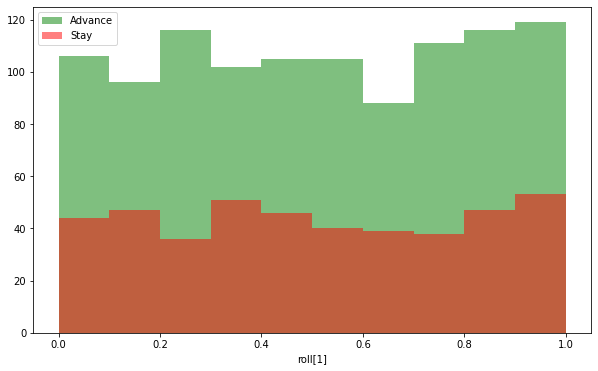

In [87]:
# This shows the first roll is uncorrelated to whether the runner advances
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    df[df['passed']]['roll1'],
    bins=10,
    range=[0.,1.],
    color="green",
    label="Advance",
    alpha = 0.5
)
ax.hist(
    df[~df['passed']]['roll1'],
    bins=10,
    range=[0.,1.],
    color="red",
    label="Stay",
    alpha = 0.5
)

ax.set_xlabel('bin counts')
ax.set_xlabel("roll[1]")

ax.legend()

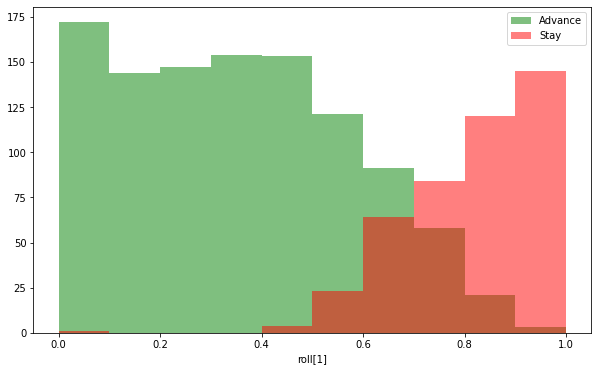

In [88]:
# This shows the second roll is related to whether the runner advances
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.hist(
    df[df['passed']]['roll2'],
    bins=10,
    range=[0.,1.],
    color="green",
    label="Advance",
    alpha = 0.5
)
ax.hist(
    df[~df['passed']]['roll2'],
    bins=10,
    range=[0.,1.],
    color="red",
    label="Stay",
    alpha = 0.5
)

ax.set_xlabel('bin counts')
ax.set_xlabel("roll[1]")

ax.legend()

In [140]:
X = dfc[
    [
        "roll2",
        "passed",
        # "roll_avg",
        # "batter_patheticism_with_vibe",
        # "batter_tragicness_with_vibe",
        # "batter_inv_tragicness",
        # "batter_inv_patheticism",
        # "pitcher_shakespearianism_with_vibe",
        # 'fielder_anticapitalism_with_vibe',
        # 'fielder_chasiness_with_vibe',
        # 'fielder_omniscience_with_vibe',
        'fielder_tenaciousness_with_vibe',
        # 'fielder_watchfulness_with_vibe',
        # 'fielder2_anticapitalism_with_vibe',
        # 'fielder2_chasiness_with_vibe',
        # 'fielder2_omniscience_with_vibe',
        # 'fielder2_tenaciousness_with_vibe',
        # 'fielder2_watchfulness_with_vibe',
        # 'ballpark_grandiosity',
        # 'ballpark_fortification',
        # 'ballpark_obtuseness',
        # 'ballpark_ominousness',
        'ballpark_inconvenience',
        # 'ballpark_viscosity',
        # 'ballpark_forwardness',
        # 'ballpark_mysticism',
        'ballpark_elongation',
        # 'runner_on_second_base_thirst_with_vibe',
        # 'runner_on_second_laserlikeness_with_vibe',
        # 'runner_on_second_continuation_with_vibe',
        # 'runner_on_second_ground_friction_with_vibe',
        'runner_on_third_indulgence_with_vibe',
        #'ballpark_filthiness',
    ]
]

# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]

# Test out a specific coefficient
# X["roll1"] = X["roll1"]-0.4*X["pitcher_shakespearianism_with_vibe"]
# X.drop("pitcher_shakespearianism_with_vibe", axis="columns", inplace=True)
# X["roll1"] = X["roll1"]-0.1*X["fielder_tenaciousness_with_vibe"]
# X.drop("fielder_tenaciousness_with_vibe", axis="columns", inplace=True)
y = X["passed"]
X = X.drop("passed", axis=1)
X

,roll2,fielder_tenaciousness_with_vibe,ballpark_inconvenience,ballpark_elongation,runner_on_third_indulgence_with_vibe
0,0.625520,0.160344,0.500000,0.500000,1.044509
2,0.261447,1.014194,0.500000,0.500000,0.484904
3,0.353593,0.489473,0.500000,0.500000,1.104098
6,0.652682,0.702462,0.500000,0.500000,1.128678
7,0.490988,1.106564,0.500000,0.500000,1.205040
...,...,...,...,...,...
1498,0.074204,0.698275,0.505260,0.575745,0.729781
1500,0.758012,0.415859,0.596246,0.540903,1.248407
1501,0.291341,0.273484,0.540501,0.475801,1.132846
1502,0.035257,1.336066,0.479740,0.481888,1.248878


In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

#trainedsvm = svm.LinearSVC(intercept_scaling=1000, dual=False, max_iter=100000, C=1000, class_weight="balanced").fit(
trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=1000, class_weight="balanced").fit(
    X2, y
)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

[[261   0]
 [  0 604]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       261
        True       1.00      1.00      1.00       604

    accuracy                           1.00       865
   macro avg       1.00      1.00      1.00       865
weighted avg       1.00      1.00      1.00       865

1.0


In [142]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-0.59653225]


[(1.0, 'roll2'),
 (-0.35021142394668825, 'runner_on_third_indulgence_with_vibe'),
 (0.10507789248653808, 'ballpark_elongation'),
 (0.09590267261241811, 'fielder_tenaciousness_with_vibe'),
 (0.09365388255833178, 'ballpark_inconvenience')]

[0.59653225]
(-0.09590267261241811, 'fielder_tenaciousness_with_vibe')
(-0.09365388255833178, 'ballpark_inconvenience')
(-0.10507789248653808, 'ballpark_elongation')
(0.35021142394668825, 'runner_on_third_indulgence_with_vibe')


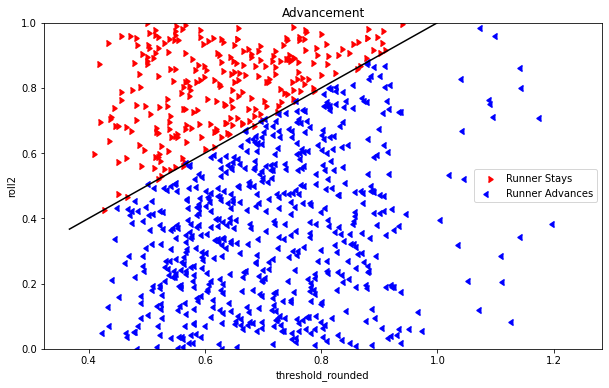

In [151]:
# Manual threshold
# dfc["threshold_rounded"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc['ballpark_elongation'] - 0.50)
dfc["threshold_rounded"] = 0.50 + 0.35 * dfc["runner_on_third_indulgence_with_vibe"] - 0.10 * dfc["fielder_tenaciousness_with_vibe"] - 0.10 * (dfc["ballpark_inconvenience"] - 0.50) - 0.10 * (dfc["ballpark_elongation"] - 0.50)
# dfc["threshold_rounded"] = 0.50 + 0.35 * dfc["runner_on_second_indulgence_with_vibe"] - 0.10 * (dfc['ballpark_elongation'] - 0.50)

# SVC threshold
dfc["threshold"] = -intercept_scaled[0]
print(-intercept_scaled)
for pair in zip(-np.array(coef_list), X.columns):
    if pair[1] != "roll2":
        print(pair)
        dfc["threshold"] += pair[0] * dfc[pair[1]]

x_val = "threshold_rounded"
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor='white')
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]]["roll2"],
    color="red",
    label="Runner Stays",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]]["roll2"],
    color="blue",
    label="Runner Advances",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll2")
ax.set_title("Advancement")
# ax.set_xlim(0.484, 0.499)
ax.set_ylim(0, 1)

ax.plot(ax.get_xlim(), ax.get_xlim(), "k")

ax.legend()


0 outliers


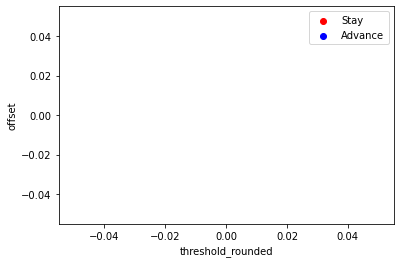

In [155]:
dfc["offset"] = dfc["roll2"] - dfc["threshold_rounded"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]
print(f"{len(outliers)} outliers")

fig, ax = plt.subplots(1, facecolor='white')
x_val = "threshold_rounded"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="Stay",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Advance",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

In [156]:
table = outliers
print(len(table))
#table = table[table['event_type'] == 'Out']
table[
    [
        "season",
        "day",
        "offset",
        "roll",
        "threshold_rounded",
        "event_type",
        "out_count",
        #"baserunner_count",
        #"top_of_inning",
        # "inning",
        # "home_score",
        # "away_score",
        #"event_type",
        #"ballpark_filthiness",
        # "pitcher_name",
        "fielder_name",
        # "batter_name",
        "runner_on_second_name",
        "weather",
        # "pitcher_mods",
        # "runner_on_second_vibes",
        # "fielder_vibes",
        "fielder_tenaciousness_with_vibe",
        "runner_on_second_indulgence_with_vibe",
        # "batter_mods",
        "fielder_mods",
        "runner_on_second_mods",
        "batting_team_mods",
        "pitching_team_mods",
        "game_id",
        "play_count",
    ]
].sort_values("offset", ascending=True)
# len(table)

0


,season,day,offset,roll,threshold_rounded,event_type,out_count,fielder_name,runner_on_second_name,weather,fielder_tenaciousness_with_vibe,runner_on_second_indulgence_with_vibe,fielder_mods,runner_on_second_mods,batting_team_mods,pitching_team_mods,game_id,play_count


In [157]:
list(df.columns)

['event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'runner_on_first_base_thirst',
 'runner_on_first_continuation',
 'runner_on_first_ground_friction',
 'runner_on_first_indulgence',
 'runner_on_first_laserlikeness',
 'runner_on_first_multiplier',
 'runner_on_second_base_thirst',
 'runner_on_second_continuation',
 'runner_on_second_ground_friction',
 'runner_on_second_indulgence',
 'runne